## Лабораторная работа 2
### Выборочное наблюдение
1. Из генеральной совокупности сгенерировать 36 выборок одинакового
объема, для каждой из которых найти выборочную среднюю. Объем
определить по схеме повторной выборки так, чтобы с надежностью γ = 0,95
обеспечить точность оценки математического ожидания δ = 3 года.
2. На основании полученных значений выборочных средних построить
интервальный ряд распределения, в котором левая граница – округленное
вниз минимальное значение выборочной средней, правая граница –
округленное вверх максимальное значение выборочной средней, длина
интервала – 1 год. Вычислить относительные частоты, построить
гистограмму.


35.37300681614903
[36.21, 33.53, 36.39, 36.63, 39.4, 35.58, 34.48, 32.79, 35.61, 36.27, 32.48, 34.97, 35.66, 35.34, 35.03, 35.08, 34.03, 34.82, 37.65, 32.84, 35.9, 35.47, 34.77, 37.6, 35.89, 34.69, 33.6, 37.32, 35.6, 33.81, 35.48, 35.87, 36.79, 36.11, 36.37, 38.19]
Интервальные ряды и относительные частоты:
[32, 33: 0.083
[33, 34: 0.083
[34, 35: 0.167
[35, 36: 0.333
[36, 37: 0.194
[37, 38: 0.083
[38, 39: 0.028
[39, 40: 0.028


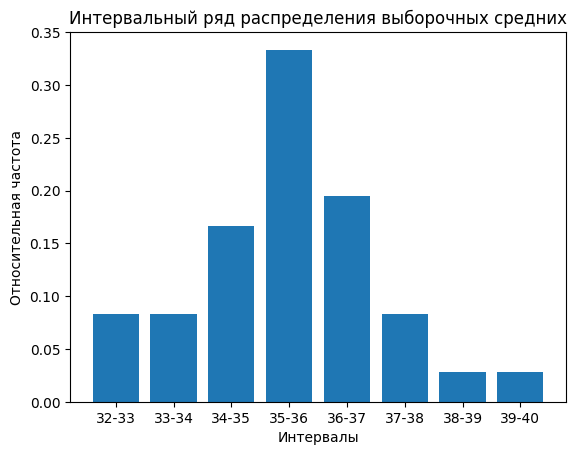

In [ ]:
from math import *
import random
import copy
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
d_row = [] #Дискретный ряд
N = 0 #Общая сумма частот ряда

with open(r'Москва_2021.txt') as f:
    s = f.read().splitlines()
unique = []
unc = []
N = len(s)

with open(r'Дискретный ряд.txt', 'w+') as t:
    for i in s:
        if i not in unique:
            unique.append(i)
    unique.sort()
    for i in unique:
        unc.append(s.count(i))
    for i in range(0, len(unique)):
        t.write(str(unique[i]) + ' ' + str(unc[i]) + ' ' + str(unc[i] / N) + '\n')
    t.close()

with open(r'Дискретный ряд.txt', 'r') as f:
    r = f.readlines()
    for i in range(len(r)):
        d_row.append(r[i].split(" "))
        d_row[i][0] = int(d_row[i][0])
        d_row[i][1] = int(d_row[i][1])
        d_row[i][2] = float(d_row[i][2])
    f.close

def average(row):
    average = 0
    l = copy.deepcopy(row)
    for i in range(0, len(l)):
        average += float(l[i][0]) * float(l[i][1])
    return average / N

def variance(row):
    mx = 0
    mx2 = 0
    l = copy.deepcopy(row)
    
    for i in range(0, len(l)):
        mx += float(l[i][0]) * float(l[i][1])
        mx2 += (float(l[i][0])**2) * float(l[i][1])
    mx = mx / N
    mx2 = mx2 / N
    return mx2 - (mx**2)

def sample_size(row, accuracy=3.0, reliability=0.95):
    z = norm.ppf((1 + reliability) / 2)
    sigma = np.sqrt(variance(row))
    n = (z * sigma / accuracy)**2
    return ceil(n)

def generate_samples(row, num_samples=36):
    n = sample_size(row)
    data = []
    for age, freq, _ in row:
        data.extend([age] * freq)
    
    sample_means = []
    for _ in range(num_samples):
        sample = random.choices(data, k=n)
        sample_means.append(round(float(np.mean(sample)), 2))
    return sample_means

sample_means = generate_samples(d_row)
print(sample_means)

left_bound = floor(min(sample_means))
right_bound = ceil(max(sample_means))
intervals = list(range(left_bound, right_bound + 1))
freqs = [0] * (len(intervals) - 1)

for mean in sample_means:
    for i in range(len(intervals) - 1):
        if intervals[i] <= mean < intervals[i + 1]:
            freqs[i] += 1
            break
    else:
        if mean == intervals[-1]:
            freqs[-1] += 1

total = len(sample_means)
rel_freqs = [f / total for f in freqs]

with open(r'Интервальный ряд.txt', 'w', encoding='utf-8') as t:
    for i in range(len(freqs)):
        line = str(intervals[i]) + "-" + str(intervals[i + 1]) + " " + str(round(rel_freqs[i], 4)) + "\n"
        t.write(line)

print("Интервальные ряды и относительные частоты:")
for i in range(len(freqs)):
    print("[" + str(intervals[i]) + ", " + str(intervals[i+1]) + ": " + str(round(rel_freqs[i], 3)))

#График
plt.bar(
    [f"{intervals[i]}-{intervals[i+1]}" for i in range(len(freqs))],
    rel_freqs, width=0.8, align='center'
)
plt.xlabel("Интервалы")
plt.ylabel("Относительная частота")
plt.title("Интервальный ряд распределения выборочных средних")
plt.show()



### Статистические оценки параметров распределения
1. Полагая, что распределение среднего возраста подчиняется
нормальному закону, осуществить выравнивание статистического ряда.
Найти точечные оценки параметров методом моментов. Построить кривую
Гаусса, аппроксимировав ею гистограмму частот.
2. На основании одной из сгенерированных выборок найти
доверительный интервал для оценки математического ожидания случайной
величины «возраст» с надежностью 0,95, предполагая, что среднее
квадратическое отклонение неизвестно

[35.81, 35.77, 37.74, 35.73, 35.48, 33.37, 35.26, 35.4, 35.19, 35.98, 34.24, 36.24, 36.13, 35.34, 35.02, 34.89, 33.52, 35.06, 36.58, 32.68, 35.5, 34.52, 35.08, 36.39, 36.68, 35.02, 34.34, 36.58, 35.98, 34.89, 35.69, 36.02, 34.42, 36.08, 35.11, 33.82]
Интервальные ряды и относительные частоты:
[32, 33: 0.028
[33, 34: 0.083
[34, 35: 0.167
[35, 36: 0.472
[36, 37: 0.222
[37, 38: 0.028


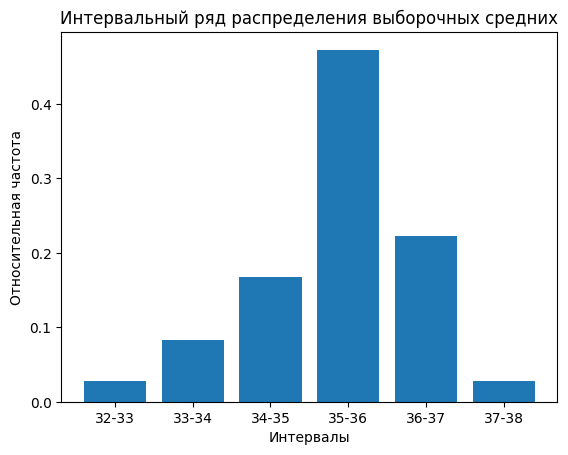

In [10]:
from math import *
import random
import copy
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
d_row = [] #Дискретный ряд
N = 0 #Общая сумма частот ряда

with open(r'Москва_2021.txt') as f:
    s = f.read().splitlines()
unique = []
unc = []
N = len(s)

with open(r'Дискретный ряд.txt', 'w+') as t:
    for i in s:
        if i not in unique:
            unique.append(i)
    unique.sort()
    for i in unique:
        unc.append(s.count(i))
    for i in range(0, len(unique)):
        t.write(str(unique[i]) + ' ' + str(unc[i]) + ' ' + str(unc[i] / N) + '\n')
    t.close()

with open(r'Дискретный ряд.txt', 'r') as f:
    r = f.readlines()
    for i in range(len(r)):
        d_row.append(r[i].split(" "))
        d_row[i][0] = int(d_row[i][0])
        d_row[i][1] = int(d_row[i][1])
        d_row[i][2] = float(d_row[i][2])
    f.close

def average(row):
    average = 0
    l = copy.deepcopy(row)
    for i in range(0, len(l)):
        average += float(l[i][0]) * float(l[i][1])
    return average / N

def variance(row):
    mx = 0
    mx2 = 0
    l = copy.deepcopy(row)
    
    for i in range(0, len(l)):
        mx += float(l[i][0]) * float(l[i][1])
        mx2 += (float(l[i][0])**2) * float(l[i][1])
    mx = mx / N
    mx2 = mx2 / N
    return mx2 - (mx**2)

def sample_size(row, accuracy=3.0, reliability=0.95):
    z = norm.ppf((1 + reliability) / 2)
    sigma = np.sqrt(variance(row))
    n = (z * sigma / accuracy)**2
    return ceil(n)

def generate_samples(row, num_samples=36):
    n = sample_size(row)
    data = []
    for age, freq, _ in row:
        data.extend([age] * freq)
    
    sample_means = []
    for _ in range(num_samples):
        sample = random.choices(data, k=n)
        sample_means.append(round(float(np.mean(sample)), 2))
    return sample_means

sample_means = generate_samples(d_row)
print(sample_means)

left_bound = floor(min(sample_means))
right_bound = ceil(max(sample_means))
intervals = list(range(left_bound, right_bound + 1))
freqs = [0] * (len(intervals) - 1)

for mean in sample_means:
    for i in range(len(intervals) - 1):
        if intervals[i] <= mean < intervals[i + 1]:
            freqs[i] += 1
            break
    else:
        if mean == intervals[-1]:
            freqs[-1] += 1

total = len(sample_means)
rel_freqs = [f / total for f in freqs]

with open(r'Интервальный ряд.txt', 'w', encoding='utf-8') as t:
    for i in range(len(freqs)):
        line = str(intervals[i]) + "-" + str(intervals[i + 1]) + " " + str(round(rel_freqs[i], 4)) + "\n"
        t.write(line)

print("Интервальные ряды и относительные частоты:")
for i in range(len(freqs)):
    print("[" + str(intervals[i]) + ", " + str(intervals[i+1]) + ": " + str(round(rel_freqs[i], 3)))

#График
plt.bar(
    [f"{intervals[i]}-{intervals[i+1]}" for i in range(len(freqs))],
    rel_freqs, width=0.8, align='center'
)
plt.xlabel("Интервалы")
plt.ylabel("Относительная частота")
plt.title("Интервальный ряд распределения выборочных средних")
plt.show()

